### Keras MNN 解决 MNIST 问题

#### 1. 使用 conda 安装 Keras

` conda install keras `

#### 2. 导入 MNIST 数据集

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#### 3. 处理数据集

* 有 60000 个训练集，10000 个测试集

* 除以 255 是为了将 0-255 的灰度值映射到 0-1 之间

In [3]:
x_train = x_train.reshape(60000,784).astype('float32') / 255
x_test = x_test.reshape(10000,784).astype('float32') / 255

In [4]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#### 4. 建立模型

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [6]:
model = Sequential([
    Dense(units=1000,
          input_dim=784,
          kernel_initializer='normal',
          activation='relu'),
    Dropout(0.5),
    Dense(units=100,
          kernel_initializer='normal',
          activation='relu'),
    Dense(units=10,
          kernel_initializer='normal',
          activation='softmax')
])

#### 5. 输出模型结构

In [7]:
from keras.utils import plot_model
plot_model(model,
           to_file='MNN_MNIST_model.png',
           show_shapes=True,
           show_layer_names=False)

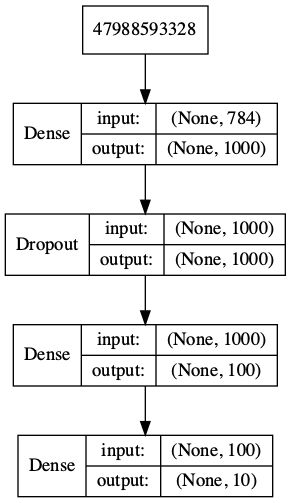

In [8]:
from IPython.display import Image
Image('Keras_MNN_MNIST_model.png')

#### 6. 定义训练方式

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### 7. 开始训练

In [ ]:
history = model.fit(x=x_train,
                   y=y_train,
                   validation_split=0.2,
                   epochs=10,
                   batch_size=64,
                   verbose=2)